In [1]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense,Dropout

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def readData():   
    get_data=pd.read_excel("Titanic_Data.xls")

    column=["survived","name","pclass","sex","age","sibsp","parch","fare","embarked"]
    # survived:是否存活
    # name: 姓名
    # pclass: 住的艙等
    # sex: 性別
    # age: 年齡
    # sibsp: 兄弟姊妹＋老婆丈夫數量
    # parch: 父母小孩的數量
    # fare: 票的費用
    # embarked: 哪個港口出發

    get_data=get_data[column]
    
    get_data=get_data.drop(['name'],axis=1)

    #填補nan
    age_mean=get_data['age'].mean()
    get_data['age']=get_data['age'].fillna(age_mean)

    #填補nan
    fare_mean=get_data['fare'].mean()
    get_data['fare']=get_data['fare'].fillna(fare_mean)

    #轉換性別為1和0
    get_data['sex']=get_data['sex'].map({'female':0,'male':1}).astype(int)

    #將embarked轉為One hot形式
    get_data=pd.get_dummies(data=get_data,columns=["embarked"])
    
    return get_data

In [3]:
#processed data
data=readData()
print(data)

      survived  pclass  sex        age  sibsp  parch      fare  embarked_C  \
0            1       1    0  29.000000      0      0  211.3375           0   
1            1       1    1   0.916700      1      2  151.5500           0   
2            0       1    0   2.000000      1      2  151.5500           0   
3            0       1    1  30.000000      1      2  151.5500           0   
4            0       1    0  25.000000      1      2  151.5500           0   
5            1       1    1  48.000000      0      0   26.5500           0   
6            1       1    0  63.000000      1      0   77.9583           0   
7            0       1    1  39.000000      0      0    0.0000           0   
8            1       1    0  53.000000      2      0   51.4792           0   
9            0       1    1  71.000000      0      0   49.5042           1   
10           0       1    1  47.000000      1      0  227.5250           1   
11           1       1    0  18.000000      1      0  227.5250  

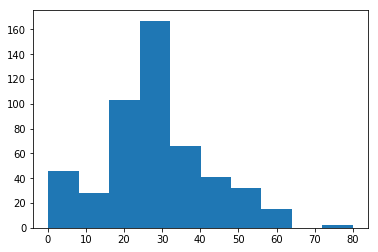

In [4]:
#age-->survived
#得到年齡與存活率的關係
#y軸為存活人數
#x軸為年齡
data=readData()
columns=['survived','age']
data=data[columns]
data=data[data['survived']==1]
data=data.drop(["survived"], axis=1)
plt.hist(data['age'])
plt.show()

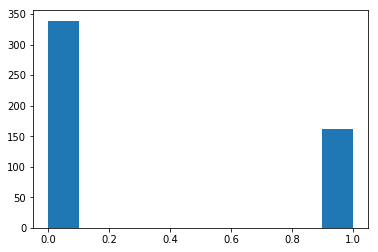

In [5]:
#sex-->survived
#0-->woman
#1-->man
#得到性別與存活率的關係
#y軸為存活人數
#x軸為男或女
data=readData()
columns=['survived','sex']
data=data[columns]
data=data[data['survived']==1]
data=data.drop(["survived"], axis=1)
plt.hist(data['sex'])
plt.show()

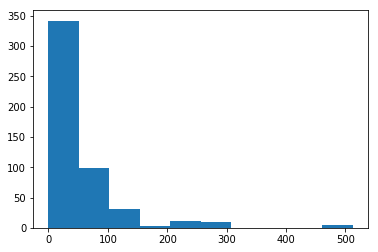

In [6]:
#fare-->survived
#得到票價與存活率的關係
#y軸為存活人數
#x軸為票價
data=readData()
columns=['survived','fare']
data=data[columns]
data=data[data['survived']==1]
data=data.drop(["survived"], axis=1)
plt.hist(data['fare'])
plt.show()

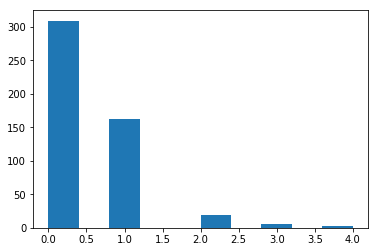

In [7]:
#sibsp-->survived
#得到兄弟姊妹＋老婆丈夫數量與存活率的關係
#y軸為存活人數
#x軸為兄弟姊妹＋老婆丈夫數量
data=readData()
columns=['survived','sibsp']
data=data[columns]
data=data[data['survived']==1]
data=data.drop(["survived"], axis=1)
plt.hist(data['sibsp'])
plt.show()

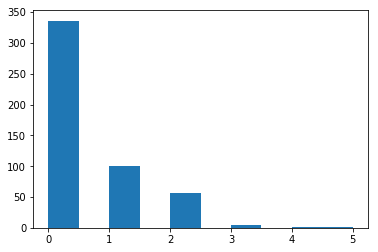

In [8]:
#parch-->survived
#得到父母小孩的數量與存活率的關係
#y軸為存活人數
#x軸為父母小孩的數量
data=readData()
columns=['survived','parch']
data=data[columns]
data=data[data['survived']==1]
data=data.drop(["survived"], axis=1)
plt.hist(data['parch'])
plt.show()

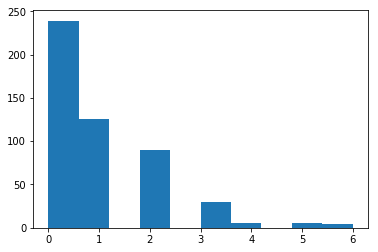

In [9]:
#parch+sibsp-->survived
#得到父母小孩的數量+兄弟姊妹＋老婆丈夫數量與存活率的關係
#y軸為存活人數
#x軸為父母小孩的數量+兄弟姊妹＋老婆丈夫數量
data=readData()
data['parch']=data['parch']+data['sibsp']
columns=['survived','parch']
data=data[columns]
data=data[data['survived']==1]
data=data.drop(["survived"], axis=1)
plt.hist(data['parch'])
plt.show()

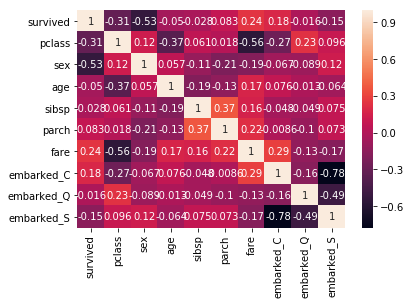

In [10]:
#Plot HeatMap using seaborn
data=readData()
sns.heatmap(data.corr(),annot=True)
plt.show()

Train on 919 samples, validate on 103 samples
Epoch 1/30
919/919 [==============================] - 0s 265us/step - loss: 0.6906 - acc: 0.5691 - val_loss: 0.6732 - val_acc: 0.8058
Epoch 2/30
919/919 [==============================] - 0s 29us/step - loss: 0.6653 - acc: 0.6366 - val_loss: 0.5845 - val_acc: 0.8155
Epoch 3/30
919/919 [==============================] - 0s 33us/step - loss: 0.5909 - acc: 0.7247 - val_loss: 0.4655 - val_acc: 0.7961
Epoch 4/30
919/919 [==============================] - 0s 36us/step - loss: 0.5170 - acc: 0.7813 - val_loss: 0.4376 - val_acc: 0.8058
Epoch 5/30
919/919 [==============================] - 0s 35us/step - loss: 0.4874 - acc: 0.7802 - val_loss: 0.4394 - val_acc: 0.8058
Epoch 6/30
919/919 [==============================] - 0s 36us/step - loss: 0.4750 - acc: 0.7791 - val_loss: 0.4211 - val_acc: 0.8155
Epoch 7/30
919/919 [==============================] - 0s 35us/step - loss: 0.4690 - acc: 0.7813 - val_loss: 0.4184 - val_acc: 0.8155
Epoch 8/30
919/919 [==

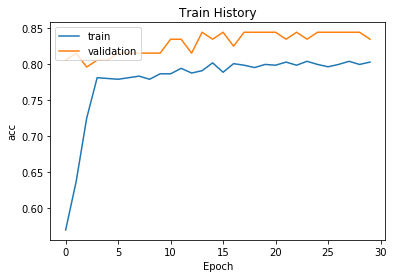

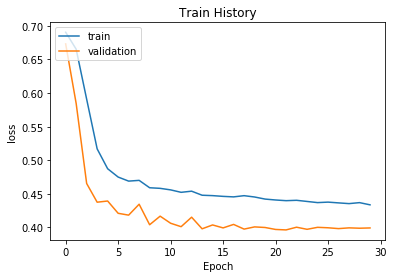

In [11]:
#use MLP to predict survive rate
#利用 MLP 建立模型預測乘客存活率

data=readData()

msk=numpy.random.rand(len(data))<0.8

data=data.values

#將資料分為survived一組和其餘features一組
answer=data[:,0]
features=data[:,1:]

#將資料正規化
scale=preprocessing.MinMaxScaler(feature_range=(0,1))
features=scale.fit_transform(features)


#將資料分為訓練和測試的部分
train_x=features[msk]
train_y=answer[msk]
test_x=features[~msk]
test_y=answer[~msk]

#建立模型
#binary_crossentropy可以分群,分1和0
model=Sequential()
model.add(Dense(units=40,input_dim=9,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=train_x,y=train_y,validation_split=0.1,epochs=30,batch_size=30,verbose=1)

#畫出訓練的歷史過程
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

accuracy=model.evaluate(x=test_x,y=test_y)
print("")
print("")
print("")
print('accuracy:',accuracy[1])

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')